In [90]:
import pandas as pd
import numpy as np
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

In [91]:
new_retail_data = r"C:\Users\ganes\DataScience\Gen_AI\LangChain\Course_GenAI\Gen_AI_In-Depth\product_recomendation_system\data\new_retail_data.csv"
data = r"C:\Users\ganes\DataScience\Gen_AI\LangChain\Course_GenAI\Gen_AI_In-Depth\product_recomendation_system\data\data.csv"

In [92]:
# product = pd.read_csv("filtered_products.csv")
# product.head()

In [93]:
product = pd.read_csv(new_retail_data)
product.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [94]:
product.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [95]:
selected_columns = [
    'Customer_ID', 'Age', 'Gender', 'Income', 'Customer_Segment',
    'Product_Category', 'Product_Brand', 'Product_Type', 'products',
    'Amount', 'Total_Amount', 'Total_Purchases',
    'Feedback', 'Ratings',
    'Date', 'Year', 'Month', 'Time'
]

In [96]:
product = product[selected_columns].head(5000)
product.head()

,Customer_ID,Age,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,products,Amount,Total_Amount,Total_Purchases,Feedback,Ratings,Date,Year,Month,Time
0,37249.0,21.0,Male,Low,Regular,Clothing,Nike,Shorts,Cycling shorts,108.028757,324.086270,3.0,Excellent,5.0,9/18/2023,2023.0,September,22:03:55
1,69749.0,19.0,Female,Low,Premium,Electronics,Samsung,Tablet,Lenovo Tab,403.353907,806.707815,2.0,Excellent,4.0,12/31/2023,2023.0,December,8:42:04
2,30192.0,48.0,Male,Low,Regular,Books,Penguin Books,Children's,Sports equipment,354.477600,1063.432799,3.0,Average,2.0,4/26/2023,2023.0,April,4:06:29
3,62101.0,56.0,Male,High,Premium,Home Decor,Home Depot,Tools,Utility knife,352.407717,2466.854021,7.0,Excellent,4.0,5/8/2023,2023.0,May,14:55:17
4,27901.0,22.0,Male,Low,Premium,Grocery,Nestle,Chocolate,Chocolate cookies,124.276524,248.553049,2.0,Bad,1.0,1/10/2024,2024.0,January,16:54:07


In [97]:
product.shape

(5000, 18)

In [98]:
product.isna().sum()

Customer_ID         8
Age                 2
Gender              5
Income              0
Customer_Segment    0
Product_Category    6
Product_Brand       3
Product_Type        0
products            0
Amount              3
Total_Amount        9
Total_Purchases     8
Feedback            4
Ratings             4
Date                2
Year                6
Month               8
Time                5
dtype: int64

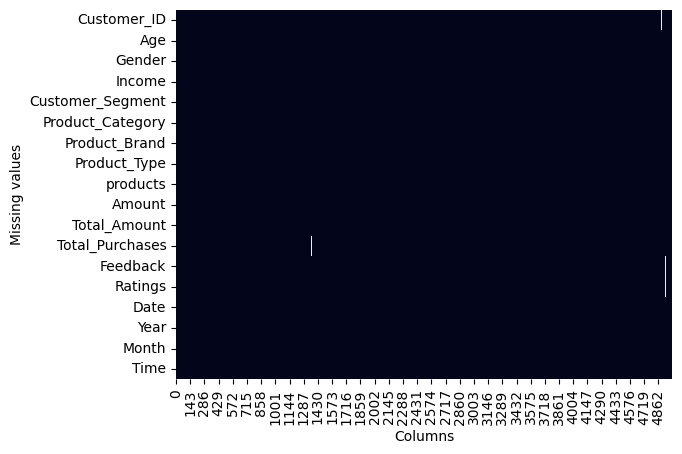

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.axes()
sns.heatmap(product.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [100]:
product = product.dropna()

In [101]:
product.isna().sum()

Customer_ID         0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Product_Category    0
Product_Brand       0
Product_Type        0
products            0
Amount              0
Total_Amount        0
Total_Purchases     0
Feedback            0
Ratings             0
Date                0
Year                0
Month               0
Time                0
dtype: int64

In [102]:
product.describe()

,Customer_ID,Age,Amount,Total_Amount,Total_Purchases,Ratings,Year
count,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000
mean,55705.410464,25.075035,254.573697,1366.361386,5.340296,2.744474,2023.165686
std,25996.297349,10.194858,142.253366,1134.623289,2.866997,1.387720,0.371837
min,10010.000000,18.000000,10.020514,10.982715,1.000000,1.000000,2023.000000
25%,33408.000000,21.000000,130.740715,430.111069,3.000000,1.000000,2023.000000
50%,55765.000000,21.000000,256.791437,1031.856981,5.000000,3.000000,2023.000000
75%,78387.500000,24.000000,377.951555,2053.170864,8.000000,4.000000,2023.000000
max,99982.000000,70.000000,499.932185,4982.953216,10.000000,5.000000,2024.000000


In [103]:
product.head(3)

,Customer_ID,Age,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,products,Amount,Total_Amount,Total_Purchases,Feedback,Ratings,Date,Year,Month,Time
0,37249.0,21.0,Male,Low,Regular,Clothing,Nike,Shorts,Cycling shorts,108.028757,324.086270,3.0,Excellent,5.0,9/18/2023,2023.0,September,22:03:55
1,69749.0,19.0,Female,Low,Premium,Electronics,Samsung,Tablet,Lenovo Tab,403.353907,806.707815,2.0,Excellent,4.0,12/31/2023,2023.0,December,8:42:04
2,30192.0,48.0,Male,Low,Regular,Books,Penguin Books,Children's,Sports equipment,354.477600,1063.432799,3.0,Average,2.0,4/26/2023,2023.0,April,4:06:29


In [104]:
product["products"].value_counts().reset_index().sort_values("count", ascending=False)

,products,count
0,Literary fiction,49
1,Xiaomi Mi,43
3,Adventure,41
2,Travel,41
4,Root beer,40
...,...,...
292,Techno-thriller,4
293,Quilt,4
294,Chandeliers,4
295,Bed skirt,3


In [105]:
product["Product_Category"].value_counts().reset_index().sort_values("count", ascending=False)

,Product_Category,count
0,Grocery,1016
1,Clothing,1008
2,Electronics,986
3,Books,983
4,Home Decor,938


In [106]:
product["Product_Brand"].value_counts().reset_index().sort_values("count", ascending=False)

,Product_Brand,count
0,Adidas,380
1,Random House,363
2,Pepsi,353
3,Sony,348
4,Nestle,345
5,Samsung,330
6,Home Depot,321
7,Coca-Cola,318
8,Zara,315
9,Penguin Books,314


In [107]:
product["Product_Type"].value_counts().reset_index().sort_values("count", ascending=False)

,Product_Type,count
0,Non-Fiction,333
1,Smartphone,329
2,Fiction,323
3,Soft Drink,241
4,Shoes,234
5,Television,230
6,Water,227
7,T-shirt,219
8,Furniture,218
9,Decorations,206


In [108]:
product["Feedback"].value_counts().reset_index().sort_values("count", ascending=False)

,Feedback,count
0,Good,1252
1,Bad,1242
2,Excellent,1227
3,Average,1210


In [109]:
product["Ratings"].value_counts().reset_index().sort_values("count", ascending=False)

,Ratings,count
0,1.0,1242
1,4.0,1230
2,2.0,1210
3,3.0,647
4,5.0,602


In [110]:
product.head()

,Customer_ID,Age,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,products,Amount,Total_Amount,Total_Purchases,Feedback,Ratings,Date,Year,Month,Time
0,37249.0,21.0,Male,Low,Regular,Clothing,Nike,Shorts,Cycling shorts,108.028757,324.086270,3.0,Excellent,5.0,9/18/2023,2023.0,September,22:03:55
1,69749.0,19.0,Female,Low,Premium,Electronics,Samsung,Tablet,Lenovo Tab,403.353907,806.707815,2.0,Excellent,4.0,12/31/2023,2023.0,December,8:42:04
2,30192.0,48.0,Male,Low,Regular,Books,Penguin Books,Children's,Sports equipment,354.477600,1063.432799,3.0,Average,2.0,4/26/2023,2023.0,April,4:06:29
3,62101.0,56.0,Male,High,Premium,Home Decor,Home Depot,Tools,Utility knife,352.407717,2466.854021,7.0,Excellent,4.0,5/8/2023,2023.0,May,14:55:17
4,27901.0,22.0,Male,Low,Premium,Grocery,Nestle,Chocolate,Chocolate cookies,124.276524,248.553049,2.0,Bad,1.0,1/10/2024,2024.0,January,16:54:07


In [111]:
def prepare_data(product_profile):
    """Create enhanced product descriptions and customer profiles"""
    
    # Create product descriptions
    product_profile['product_description'] = (
        product_profile['products'] + ". " +
        "Brand: " + product_profile['Product_Brand'] + ". " +
        "Type: " + product_profile['Product_Type'] + ". " +
        "Category: " + product_profile['Product_Category'] + ". " +
        "Price: " + product_profile['Amount'].round(2).astype(str)
    )
    
    # Create customer profiles
    customer_profiles = product_profile.groupby('Customer_ID').agg({
        'product_description': lambda x: '; '.join(x),
        'Age': 'first',
        'Gender': 'first',
        'Income': 'first',
        'Customer_Segment': 'first',
        'Total_Amount': 'sum',
        'Total_Purchases': 'sum'
    }).reset_index()
    
    return product_profile, customer_profiles

In [112]:
product_profile, customer_profiles = prepare_data(product)

In [113]:
product_profile.head()

,Customer_ID,Age,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,products,Amount,Total_Amount,Total_Purchases,Feedback,Ratings,Date,Year,Month,Time,product_description
0,37249.0,21.0,Male,Low,Regular,Clothing,Nike,Shorts,Cycling shorts,108.028757,324.086270,3.0,Excellent,5.0,9/18/2023,2023.0,September,22:03:55,Cycling shorts. Brand: Nike. Type: Shorts. Cat...
1,69749.0,19.0,Female,Low,Premium,Electronics,Samsung,Tablet,Lenovo Tab,403.353907,806.707815,2.0,Excellent,4.0,12/31/2023,2023.0,December,8:42:04,Lenovo Tab. Brand: Samsung. Type: Tablet. Cate...
2,30192.0,48.0,Male,Low,Regular,Books,Penguin Books,Children's,Sports equipment,354.477600,1063.432799,3.0,Average,2.0,4/26/2023,2023.0,April,4:06:29,Sports equipment. Brand: Penguin Books. Type: ...
3,62101.0,56.0,Male,High,Premium,Home Decor,Home Depot,Tools,Utility knife,352.407717,2466.854021,7.0,Excellent,4.0,5/8/2023,2023.0,May,14:55:17,Utility knife. Brand: Home Depot. Type: Tools....
4,27901.0,22.0,Male,Low,Premium,Grocery,Nestle,Chocolate,Chocolate cookies,124.276524,248.553049,2.0,Bad,1.0,1/10/2024,2024.0,January,16:54:07,Chocolate cookies. Brand: Nestle. Type: Chocol...


In [114]:
customer_profiles.head()

,Customer_ID,product_description,Age,Gender,Income,Customer_Segment,Total_Amount,Total_Purchases
0,10010.0,Sweatshirt. Brand: Zara. Type: Shirt. Category...,32.0,Female,Low,Regular,1429.317150,8.0
1,10017.0,Horror. Brand: HarperCollins. Type: Fiction. C...,21.0,Female,Medium,Regular,1606.072815,10.0
2,10019.0,Nokia. Brand: Samsung. Type: Smartphone. Categ...,21.0,Male,Medium,Regular,671.549781,3.0
3,10034.0,White chocolate. Brand: Nestle. Type: Chocolat...,55.0,Female,High,Regular,1186.763792,6.0
4,10040.0,Horror. Brand: Random House. Type: Fiction. Ca...,24.0,Male,Medium,Regular,238.667018,6.0


In [115]:
def calculate_product_quality(df):
    """Calculate comprehensive quality scores from feedback"""
    
    feedback_weights = {
        'Excellent': 1.0,
        'Good': 0.75,
        'Average': 0.5,
        'Bad': 0.25
    }

    product_feedback = df.groupby('product_description')['Feedback'].value_counts().unstack(fill_value=0)
    
    quality_data = []
    for desc, counts in product_feedback.iterrows():
        total = counts.sum()
        
        # Calculate weighted score
        weighted_sum = sum(counts.get(fb, 0) * wt for fb, wt in feedback_weights.items())
        base_score = weighted_sum / total if total > 0 else 0.5

        confidence = min(1.0, np.log1p(total) / np.log1p(50))
        
        quality_data.append({
            'product_description': desc,
            'quality_score': base_score,
            'weighted_score': base_score * confidence,
            'feedback_count': total,
            'is_new': total < 3,  # Flag new products
            'Excellent': counts.get('Excellent', 0),
            'Good': counts.get('Good', 0),
            'Average': counts.get('Average', 0),
            'Bad': counts.get('Bad', 0),
            'Excellent_pct': counts.get('Excellent', 0)/total if total > 0 else 0,
            'Good_pct': counts.get('Good', 0)/total if total > 0 else 0,
            'Average_pct': counts.get('Average', 0)/total if total > 0 else 0,
            'Bad_pct': counts.get('Bad', 0)/total if total > 0 else 0
        })
    
    return pd.DataFrame(quality_data)

In [116]:
product_quality = calculate_product_quality(product_profile)
product_quality.head()

,product_description,quality_score,weighted_score,feedback_count,is_new,Excellent,Good,Average,Bad,Excellent_pct,Good_pct,Average_pct,Bad_pct
0,4K TV. Brand: Samsung. Type: Television. Categ...,0.50,0.088146,1,True,0,0,1,0,0.0,0.0,1.0,0.0
1,4K TV. Brand: Samsung. Type: Television. Categ...,0.25,0.044073,1,True,0,0,0,1,0.0,0.0,0.0,1.0
2,4K TV. Brand: Samsung. Type: Television. Categ...,0.75,0.132219,1,True,0,1,0,0,0.0,1.0,0.0,0.0
3,4K TV. Brand: Samsung. Type: Television. Categ...,0.75,0.132219,1,True,0,1,0,0,0.0,1.0,0.0,0.0
4,4K TV. Brand: Samsung. Type: Television. Categ...,0.75,0.132219,1,True,0,1,0,0,0.0,1.0,0.0,0.0


In [117]:
product_quality['product_description'].duplicated().sum()

np.int64(0)

In [118]:
def create_enhanced_descriptions(row):
    if pd.isna(row['quality_score']):
        return (
            f"Product: {row['product_description']}. "
            f"Feedback summary not available. "
            f"Category: {row['Product_Category']}. Price: {row['Amount']:.2f}"
        )

    feedback_summary = (
        f"Customer feedback: {int(row['Excellent'])} Excellent, {int(row['Good'])} Good, "
        f"{int(row['Average'])} Average, {int(row['Bad'])} Bad reviews. "
        f"Overall quality score: {row['quality_score']:.2f}/1.0"
    )

    return (
        f"Product: {row['product_description']}. {feedback_summary}. "
        f"Category: {row['Product_Category']}. Price: {row['Amount']:.2f}"
    )

In [119]:
product_data = (
    product_profile.drop_duplicates('product_description')
    .merge(product_quality, on='product_description', how='left')
)

product_data.head()

,Customer_ID,Age,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,products,Amount,...,feedback_count,is_new,Excellent,Good,Average,Bad,Excellent_pct,Good_pct,Average_pct,Bad_pct
0,37249.0,21.0,Male,Low,Regular,Clothing,Nike,Shorts,Cycling shorts,108.028757,...,1,True,1,0,0,0,1.0,0.0,0.0,0.0
1,69749.0,19.0,Female,Low,Premium,Electronics,Samsung,Tablet,Lenovo Tab,403.353907,...,1,True,1,0,0,0,1.0,0.0,0.0,0.0
2,30192.0,48.0,Male,Low,Regular,Books,Penguin Books,Children's,Sports equipment,354.477600,...,1,True,0,0,1,0,0.0,0.0,1.0,0.0
3,62101.0,56.0,Male,High,Premium,Home Decor,Home Depot,Tools,Utility knife,352.407717,...,1,True,1,0,0,0,1.0,0.0,0.0,0.0
4,27901.0,22.0,Male,Low,Premium,Grocery,Nestle,Chocolate,Chocolate cookies,124.276524,...,1,True,0,0,0,1,0.0,0.0,0.0,1.0


In [120]:
product_data.shape

(4931, 31)

In [121]:
# selected_columns = ['Product_Category', 'Product_Brand', 'Product_Type', 'products', 'product_description']
# filtered_df = product_data[selected_columns]
# filtered_df.to_csv('filtered_products.csv', index=False)

In [122]:
product_data['enhanced_description'] = product_data.apply(create_enhanced_descriptions, axis=1)
product_data.head()

,Customer_ID,Age,Gender,Income,Customer_Segment,Product_Category,Product_Brand,Product_Type,products,Amount,...,is_new,Excellent,Good,Average,Bad,Excellent_pct,Good_pct,Average_pct,Bad_pct,enhanced_description
0,37249.0,21.0,Male,Low,Regular,Clothing,Nike,Shorts,Cycling shorts,108.028757,...,True,1,0,0,0,1.0,0.0,0.0,0.0,Product: Cycling shorts. Brand: Nike. Type: Sh...
1,69749.0,19.0,Female,Low,Premium,Electronics,Samsung,Tablet,Lenovo Tab,403.353907,...,True,1,0,0,0,1.0,0.0,0.0,0.0,Product: Lenovo Tab. Brand: Samsung. Type: Tab...
2,30192.0,48.0,Male,Low,Regular,Books,Penguin Books,Children's,Sports equipment,354.477600,...,True,0,0,1,0,0.0,0.0,1.0,0.0,Product: Sports equipment. Brand: Penguin Book...
3,62101.0,56.0,Male,High,Premium,Home Decor,Home Depot,Tools,Utility knife,352.407717,...,True,1,0,0,0,1.0,0.0,0.0,0.0,Product: Utility knife. Brand: Home Depot. Typ...
4,27901.0,22.0,Male,Low,Premium,Grocery,Nestle,Chocolate,Chocolate cookies,124.276524,...,True,0,0,0,1,0.0,0.0,0.0,1.0,Product: Chocolate cookies. Brand: Nestle. Typ...


In [123]:
product_data.shape

(4931, 32)

In [124]:
# product_data.to_csv('filtered_products.csv', index=False)

In [125]:
product_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income', 'Customer_Segment',
       'Product_Category', 'Product_Brand', 'Product_Type', 'products',
       'Amount', 'Total_Amount', 'Total_Purchases', 'Feedback', 'Ratings',
       'Date', 'Year', 'Month', 'Time', 'product_description', 'quality_score',
       'weighted_score', 'feedback_count', 'is_new', 'Excellent', 'Good',
       'Average', 'Bad', 'Excellent_pct', 'Good_pct', 'Average_pct', 'Bad_pct',
       'enhanced_description'],
      dtype='object')

In [126]:
from langchain.schema import Document
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

In [127]:
documents = [
    Document(page_content=row['enhanced_description'], metadata={"index": idx})
    for idx, row in product_data.iterrows()
]

text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")
documents = text_splitter.split_documents(documents)

In [128]:
documents[0]

Document(metadata={'index': 0}, page_content='Product: Cycling shorts. Brand: Nike. Type: Shorts. Category: Clothing. Price: 108.03. Customer feedback: 1 Excellent, 0 Good, 0 Average, 0 Bad reviews. Overall quality score: 1.00/1.0. Category: Clothing. Price: 108.03')

In [129]:
len(documents)

4931

In [130]:
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
db_products = FAISS.from_documents(documents, embedding=embedding_model)

In [ ]:
# db_products.save_local("faiss_index_dir")

In [132]:
db_products = FAISS.load_local(
    "faiss_index_dir",
    embeddings=embedding_model,
    allow_dangerous_deserialization=True
)

In [133]:
query = "A book to teach children about nature"
docs = db_products.similarity_search(query, k = 10)
docs

[Document(id='a5ec164c-85e0-4f49-9686-914acc69a77d', metadata={'index': 3330}, page_content="Product: Educational kits. Brand: Penguin Books. Type: Children's. Category: Books. Price: 271.03. Customer feedback: 1 Excellent, 0 Good, 0 Average, 0 Bad reviews. Overall quality score: 1.00/1.0. Category: Books. Price: 271.03"),
 Document(id='3e2d13ff-2147-401e-a3c9-f3b7a6a4f8c2', metadata={'index': 1919}, page_content="Product: Educational kits. Brand: Penguin Books. Type: Children's. Category: Books. Price: 64.14. Customer feedback: 0 Excellent, 0 Good, 0 Average, 1 Bad reviews. Overall quality score: 0.25/1.0. Category: Books. Price: 64.14"),
 Document(id='a21d0d38-ea76-4fe2-bc74-0b6256489c55', metadata={'index': 2055}, page_content="Product: Educational kits. Brand: Penguin Books. Type: Children's. Category: Books. Price: 322.87. Customer feedback: 1 Excellent, 0 Good, 0 Average, 0 Bad reviews. Overall quality score: 1.00/1.0. Category: Books. Price: 322.87"),
 Document(id='0033ee4a-aa46

In [135]:
def retrieve_semantic_recommendations(query: str, top_k: int = 20) -> pd.DataFrame:
    results = db_products.similarity_search(query, k=top_k)
    
    # Extract the index of the original rows from metadata
    indices = [doc.metadata["index"] for doc in results]
    
    # Return selected columns from product_data
    return product_data.iloc[indices][[
        'product_description',
        'enhanced_description',
        'Product_Category',
        'Product_Brand',
        'Product_Type',
        'Feedback',
        'Ratings',
        'products',
        'Amount'
    ]]

In [136]:
retrieve_semantic_recommendations("Comfortable running shorts for men", top_k=5)

,product_description,enhanced_description,Product_Category,Product_Brand,Product_Type,Feedback,Ratings,products,Amount
0,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Excellent,5.0,Cycling shorts,108.028757
319,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Average,2.0,Cycling shorts,172.510751
3887,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Average,2.0,Athletic shorts,10.020514
4450,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Bad,1.0,Athletic shorts,336.895594
4787,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Bad,1.0,Athletic shorts,320.938791


In [137]:
product = retrieve_semantic_recommendations("i want Comfortable running shorts for men under the price 78.060905")
product

,product_description,enhanced_description,Product_Category,Product_Brand,Product_Type,Feedback,Ratings,products,Amount
2157,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Good,4.0,Cycling shorts,70.883942
4228,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Excellent,4.0,Cycling shorts,455.940531
4679,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Excellent,5.0,Athletic shorts,447.531584
2692,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Bad,1.0,Athletic shorts,450.884420
2482,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Average,2.0,Cycling shorts,56.430105
1750,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Bad,1.0,Athletic shorts,413.679203
444,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Good,4.0,Cycling shorts,135.413608
1711,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Excellent,4.0,Athletic shorts,78.060905
4031,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Excellent,5.0,Cycling shorts,440.290731
4787,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Bad,1.0,Athletic shorts,320.938791


In [138]:
product.shape

(20, 9)

In [139]:
# product1 = retrieve_semantic_recommendations("wireless bluetooth earphones", top_k=5)
# product1

In [140]:
product3 = retrieve_semantic_recommendations("i want Comfortable running shorts for men under the price 806.707815", top_k=5)
product3

,product_description,enhanced_description,Product_Category,Product_Brand,Product_Type,Feedback,Ratings,products,Amount
2157,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Good,4.0,Cycling shorts,70.883942
4679,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Excellent,5.0,Athletic shorts,447.531584
2692,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Bad,1.0,Athletic shorts,450.884420
4228,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Excellent,4.0,Cycling shorts,455.940531
1750,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Bad,1.0,Athletic shorts,413.679203


In [141]:
from langchain_community.chat_models import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [142]:
custom_prompt = """
You are a product recommendation assistant.

The user has performed a semantic search and retrieved the following products:

{products}

The user’s query is: "{query}".

Your task:
- Refine and filter the product list based on the user's query.
- If the query includes specific filters (e.g., category, price range, brand, product type), apply those filters.
- If the query is vague or broad, return a diverse yet relevant selection of products.

If **no exact match** is found:
- Inform the user that no products exactly match the query.
- Instead, provide a few **closely related or similar** product suggestions based on semantic relevance.

Output format:
Return a refined list of products in a structured format as follows — for each product, include:

- 'product_description'
- 'enhanced_description'
- 'Product_Category'
- 'Product_Brand'
- 'Product_Type'
- 'Feedback'
- 'Ratings'
- 'products' (product name)
- 'Amount' (price)

Make sure your output is formatted in a way that can be easily converted into a DataFrame using standard parsing.
"""


In [143]:
llm = ChatOllama(model="mistral")
# llm = ChatOllama(model="llama3.2")
prompt = ChatPromptTemplate.from_template(custom_prompt)
chain = LLMChain(prompt=prompt, llm=llm)


In [ ]:
import re

def get_product_recommendations(query: str):
    recommendations = retrieve_semantic_recommendations(query, top_k=5)

    products_text = ""
    for _, row in recommendations.iterrows():
        products_text += f"""
- product_description: {row['product_description']}
  enhanced_description: {row['enhanced_description']}
  Product_Category: {row['Product_Category']}
  Product_Brand: {row['Product_Brand']}
  Product_Type: {row['Product_Type']}
  Feedback: {row['Feedback']}
  Ratings: {row['Ratings']}
  products: {row['products']}
  Amount: {row['Amount']}
"""

    response = chain.invoke({"query": query, "products": products_text})
    model_output = response.get("text", "").strip()

    product_blocks = model_output.split("\n- ")
    data = []

    for block in product_blocks:
        entry = {}
        lines = block.strip().splitlines()
        for line in lines:
            match = re.match(r"([\w_ ]+):\s*(.*)", line)
            if match:
                key = match.group(1).strip()
                value = match.group(2).strip()
                entry[key] = value
        if entry:
            data.append(entry)  

    return pd.DataFrame(data)

In [145]:
query = "wireless bluetooth earphones"
refined_recommendations = get_product_recommendations(query)
refined_recommendations

,product_description,enhanced_description,Product_Category,Product_Brand,Product_Type,Feedback,Ratings,products,Amount
0,Wireless Bluetooth Earphones. Brand: Sony. Typ...,Product: Wireless Bluetooth earphones. Brand: ...,Electronics,Sony,Earphones,Good,4.0,Wireless Bluetooth earphones,54.71714967
1,Bluetooth headphones. Brand: Sony. Type: Headp...,Product: Bluetooth headphones. Brand: Sony. Ty...,Electronics,Sony,Headphones,Bad,1.0,Bluetooth headphones,303.6904666
2,Bluetooth headphones. Brand: Sony. Type: Headp...,Product: Bluetooth headphones. Brand: Sony. Ty...,Electronics,Sony,Headphones,Bad,1.0,Bluetooth headphones,105.0167566
3,Bluetooth headphones. Brand: Sony. Type: Headp...,Product: Bluetooth headphones. Brand: Sony. Ty...,Electronics,Sony,Headphones,Average,2.0,Bluetooth headphones,485.07
4,Bluetooth headphones. Brand: Sony. Type: Headp...,Product: Bluetooth headphones. Brand: Sony. Ty...,Electronics,Sony,Headphones,Average,2.0,Bluetooth headphones,199.99


In [146]:
query = "i want Comfortable running shorts for men under the price 806.707815, can you please provide me 2 options?"
refined_recommendations = get_product_recommendations(query)
refined_recommendations

,Product_description,enhanced_description,Product_Category,Product_Brand,Product_Type,Feedback,Ratings,products,Amount
0,Athletic shorts. Brand: Nike. Type: Shorts. Ca...,Product: Athletic shorts. Brand: Nike. Type: S...,Clothing,Nike,Shorts,Excellent,5.0,Athletic shorts,447.5315837
1,Cycling shorts. Brand: Nike. Type: Shorts. Cat...,Product: Cycling shorts. Brand: Nike. Type: Sh...,Clothing,Nike,Shorts,Average,2.0,Cycling shorts,56.4301047
